In [1]:
from logging import Formatter
from logging import getLogger
from logging import INFO
from logging import StreamHandler

logger = getLogger(__name__)
logger.handlers.clear()
handler = StreamHandler()
handler.setLevel(INFO)
handler.setFormatter(Formatter('%(name)s - %(asctime)s - %(levelname)s - %(message)s'))
logger.addHandler(handler)

In [2]:
from os import walk
from os.path import join

for dirname, _, filenames in walk('../input/chess/'):
    for filename in filenames:
        logger.info(msg=join(dirname, filename))

__main__ - 2023-06-17 15:57:15,238 - INFO - ../input/chess/games.csv


In [3]:
from pandas import read_csv

df = read_csv(filepath_or_buffer='../input/chess/games.csv')
logger.info(msg=df.shape)
logger.info(msg=df.columns.to_list())

__main__ - 2023-06-17 15:57:15,478 - INFO - (20058, 16)
__main__ - 2023-06-17 15:57:15,480 - INFO - ['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status', 'winner', 'increment_code', 'white_id', 'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply']


In [4]:
logger.info(msg=df.dtypes)

__main__ - 2023-06-17 15:57:15,494 - INFO - id                 object
rated                bool
created_at        float64
last_move_at      float64
turns               int64
victory_status     object
winner             object
increment_code     object
white_id           object
white_rating        int64
black_id           object
black_rating        int64
moves              object
opening_eco        object
opening_name       object
opening_ply         int64
dtype: object


In [5]:
logger.info(msg='rated: {}'.format(df['rated'].value_counts().to_dict()))
logger.info(msg='unique IDs/rows: {}/{}'.format(df['id'].nunique(), len(df)))

__main__ - 2023-06-17 15:57:15,515 - INFO - rated: {True: 16155, False: 3903}
__main__ - 2023-06-17 15:57:15,523 - INFO - unique IDs/rows: 19113/20058


Text(0.5, 1.0, 'player rating')

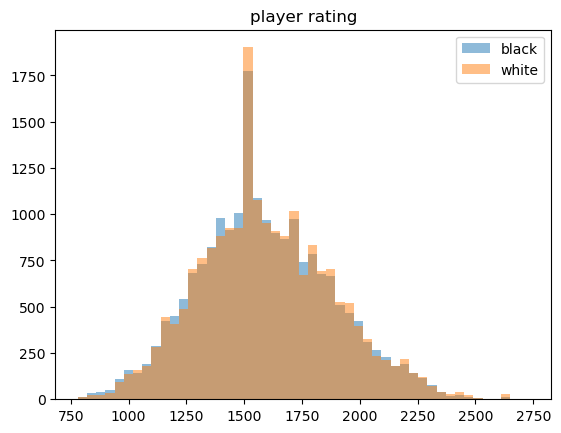

In [6]:
%matplotlib inline
from matplotlib.pyplot import hist
from matplotlib.pyplot import legend
from matplotlib.pyplot import title
from numpy import linspace

bins = linspace(780, 2730, 50)

hist(x=df['black_rating'], bins=bins, alpha=0.5, label='black')
hist(x=df['white_rating'], bins=bins, alpha=0.5, label='white')
legend(loc='upper right')
title('player rating')

<Axes: xlabel='black_rating', ylabel='white_rating'>

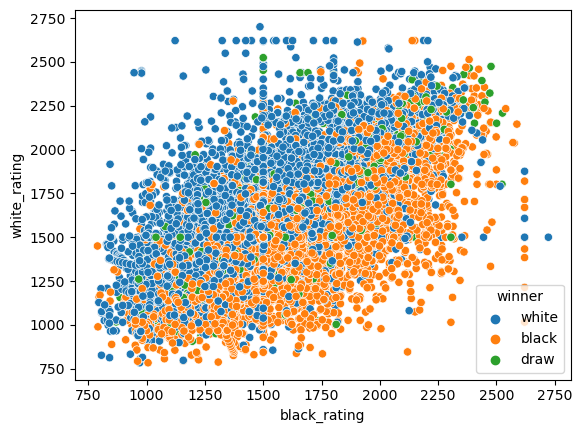

In [7]:
from seaborn import scatterplot
scatterplot(data=df, x='black_rating', y='white_rating', hue='winner',  )

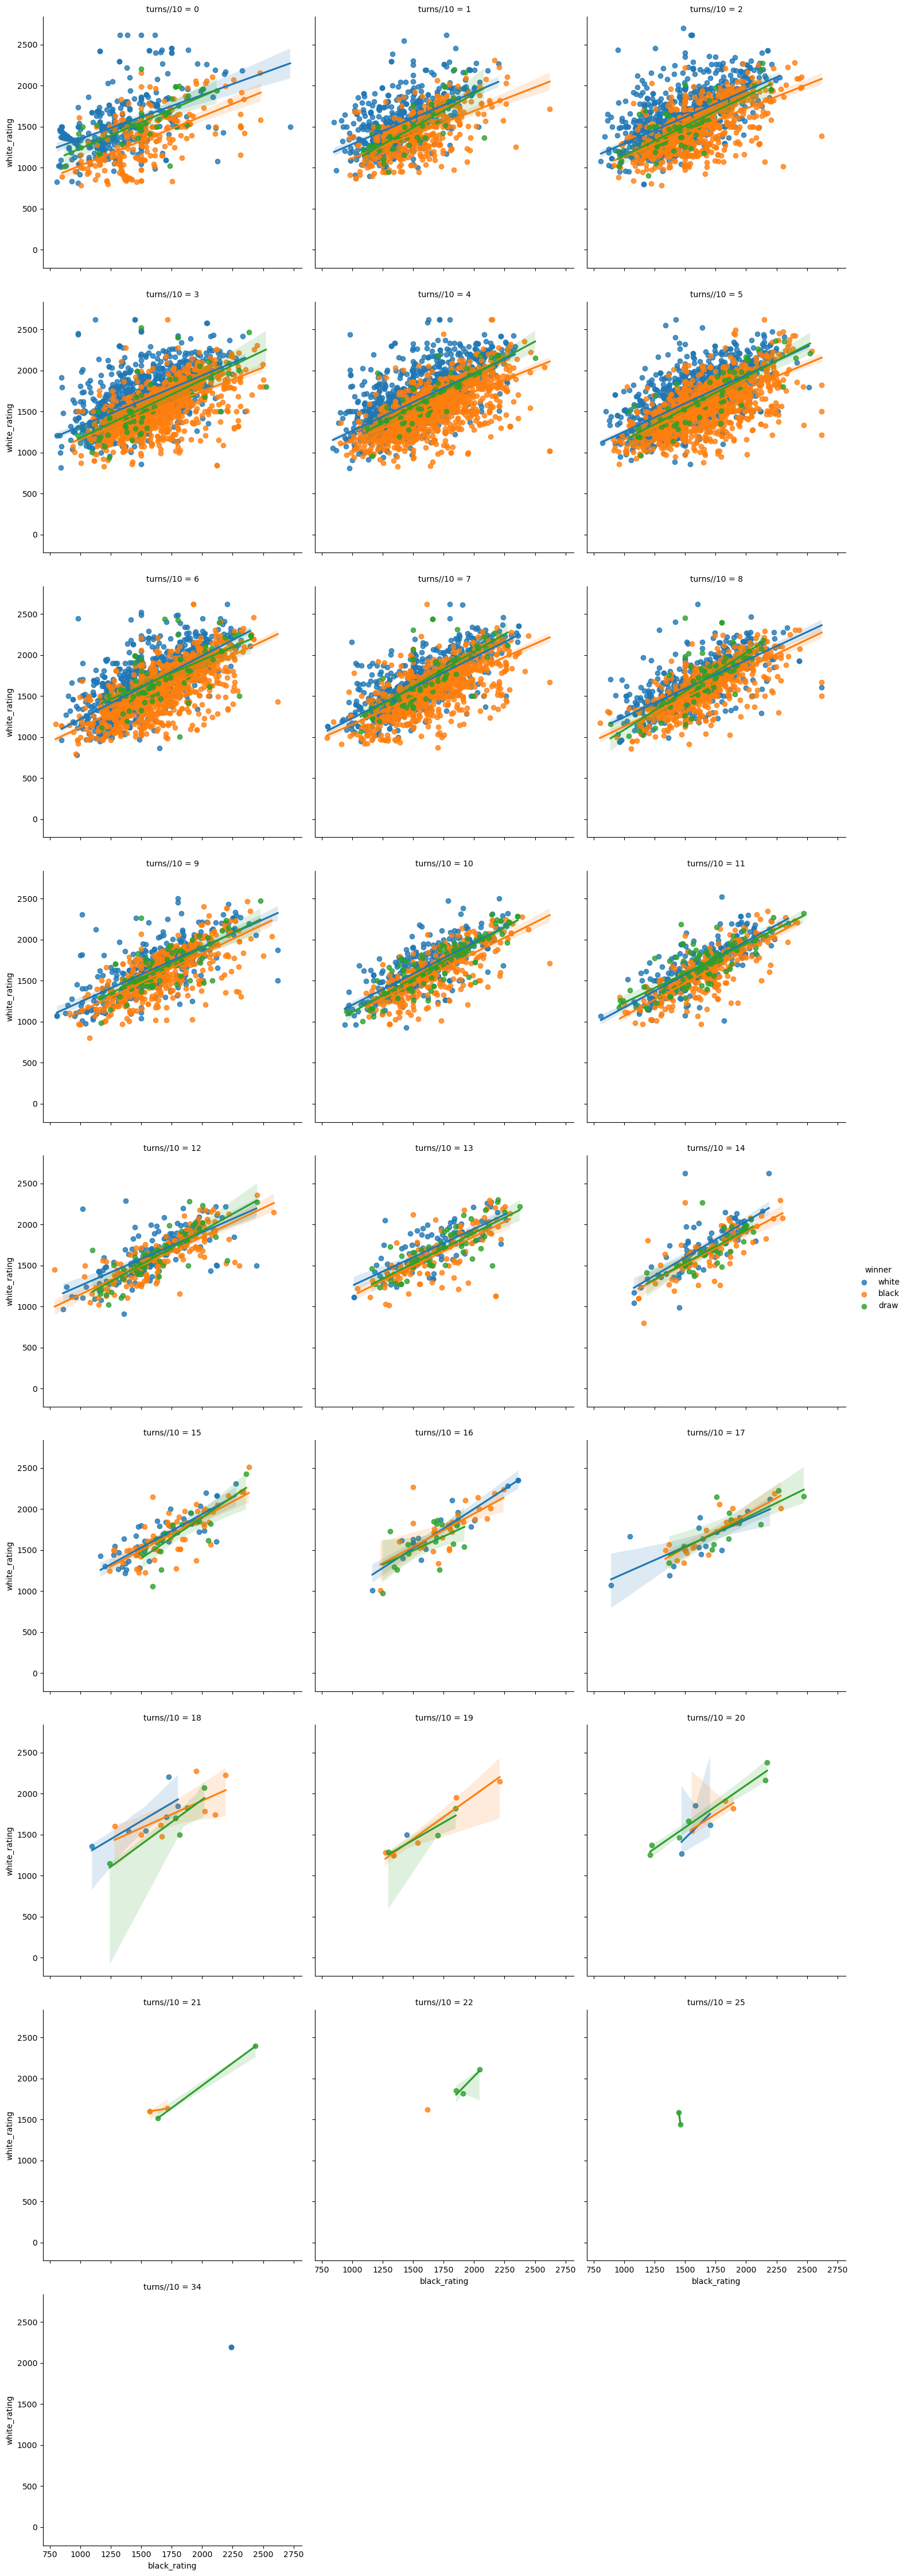

In [8]:
from seaborn import lmplot
df['turns//10'] = df['turns'].apply(func=lambda x: int(x) // 10)
lmplot(data=df, x='black_rating', y='white_rating', col='turns//10', col_wrap=3, hue='winner', )

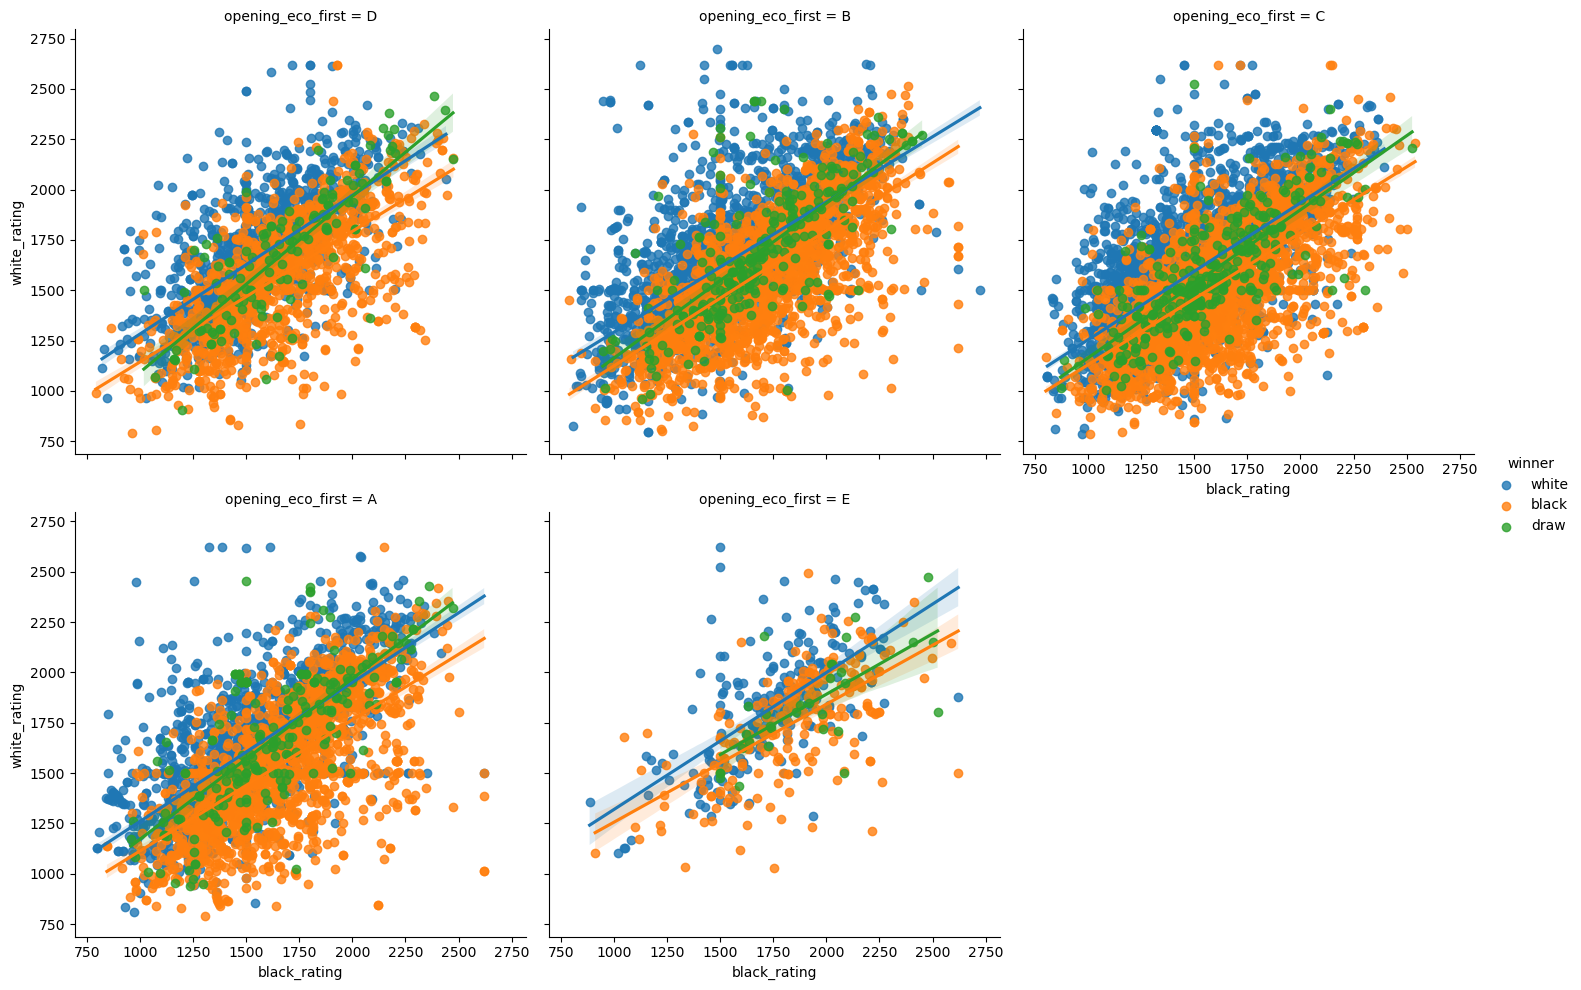

In [9]:
# logger.info(msg=df['opening_eco'].value_counts())
df['opening_eco_first'] = df['opening_eco'].apply(func=lambda x: str(x)[0])
lmplot(data=df, x='black_rating', y='white_rating', col='opening_eco_first', col_wrap=3, hue='winner', )